<a href="https://colab.research.google.com/github/musaers/Diabetic_prediction_KNN/blob/main/Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #test ve gercek veri ayirmak ixin
from sklearn.neighbors import KNeighborsClassifier #KNN icin


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


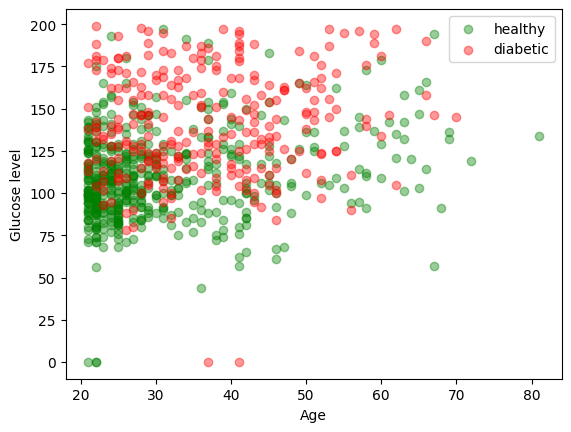

In [4]:
diabetic = data[data.Outcome == 1]
healthy = data[data.Outcome == 0]

#sadece glukoza bakarak ornek cizim

plt.scatter(healthy.Age, healthy.Glucose, color = 'green', label = 'healthy', alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.Glucose, color = 'red', label = 'diabetic', alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Glucose level')
plt.legend()
plt.show()


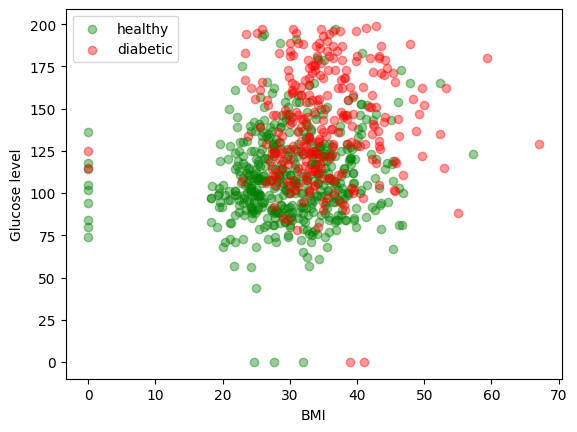

In [5]:
diabetic = data[data.Outcome == 1]
healthy = data[data.Outcome == 0]

#sadece glukoza bakarak ornek cizim

plt.scatter(healthy.BMI, healthy.Glucose, color = 'green', label = 'healthy', alpha = 0.4)
plt.scatter(diabetic.BMI, diabetic.Glucose, color = 'red', label = 'diabetic', alpha = 0.4)
plt.xlabel('BMI')
plt.ylabel('Glucose level')
plt.legend()
plt.show()

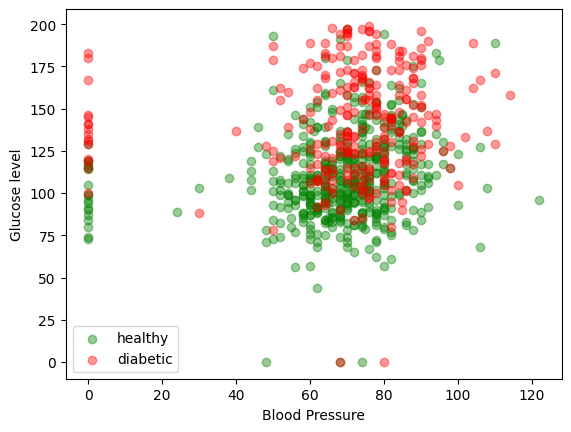

In [6]:
diabetic = data[data.Outcome == 1]
healthy = data[data.Outcome == 0]

#sadece glukoza bakarak ornek cizim

plt.scatter(healthy.BloodPressure, healthy.Glucose, color = 'green', label = 'healthy', alpha = 0.4)
plt.scatter(diabetic.BloodPressure, diabetic.Glucose, color = 'red', label = 'diabetic', alpha = 0.4)
plt.xlabel('Blood Pressure')
plt.ylabel('Glucose level')
plt.legend()
plt.show()

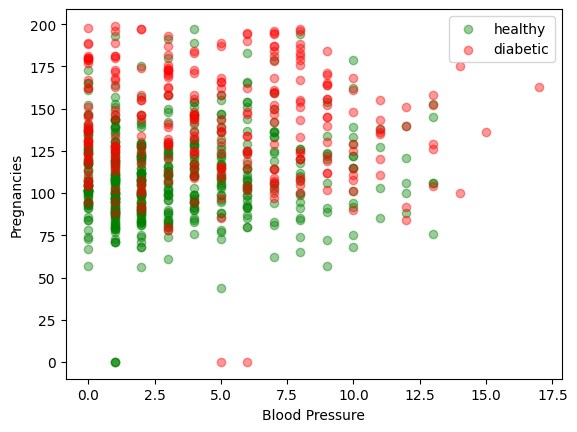

In [7]:
diabetic = data[data.Outcome == 1]
healthy = data[data.Outcome == 0]

#sadece glukoza bakarak ornek cizim

plt.scatter(healthy.Pregnancies, healthy.Glucose, color = 'green', label = 'healthy', alpha = 0.4)
plt.scatter(diabetic.Pregnancies, diabetic.Glucose, color = 'red', label = 'diabetic', alpha = 0.4)
plt.xlabel('Blood Pressure')
plt.ylabel('Pregnancies')
plt.legend()
plt.show()

In [8]:
y = data.Outcome.values
x_raw= data.drop("Outcome", axis = 1)
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü KNN algoritması x değerleri içerisinde gruplandırma yapacak..


# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve KNN algoritmasını yanıltabilir!

x = (x_raw - np.min(x_raw))/(np.max(x_raw-np.min(x_raw)))

# önce
print("before normalization\n")
print(x_raw.head())

print("\n\n\nAfter Normalization (for training data)\n")
print(x.head())



before normalization

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



After Normalization (for training data)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0

In [16]:

# splitting test and train data
# train data will be used for seperation of healthy and diabetic people
# test data will be used for models accuracy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.01,random_state=1)

# knn modelimizi oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("for K=3 test results ", knn.score(x_test, y_test))

for K=3 test results  0.75


In [17]:
# k = ?
# find the best k
counter = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train,y_train)
    print(counter, "  ", "Accuracy: %", knn_new.score(x_test,y_test)*100)
    counter += 1


1    Accuracy: % 62.5
2    Accuracy: % 87.5
3    Accuracy: % 75.0
4    Accuracy: % 87.5
5    Accuracy: % 62.5
6    Accuracy: % 75.0
7    Accuracy: % 62.5
8    Accuracy: % 75.0
9    Accuracy: % 75.0
10    Accuracy: % 87.5


In [24]:
#for a new patient
from sklearn.preprocessing import MinMaxScaler

# faster normalization with minmax
sc = MinMaxScaler()
sc.fit_transform(x_raw)

# save the column names
feature_names = x_raw.columns

# new data
new_data = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], columns=feature_names)

# Transform with the same scaler
new_data_normalized = sc.transform(new_data)

# Convert back to DataFrame with column names
new_data_normalized_df = pd.DataFrame(new_data_normalized, columns=feature_names)

# Make prediction
new_prediction = knn.predict(new_data_normalized_df)
new_prediction[0]

1